In [10]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats
from scipy.special import comb
from math import factorial, gamma

# 3.2.1 ベルヌーイ分布の学習と予測

In [11]:
def CB(a, b):
    return gamma(a + b) / (gamma(a) * gamma(b))


def Beta(mu, a, b):
    return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))


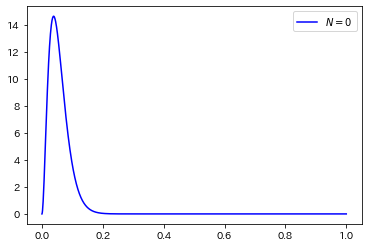

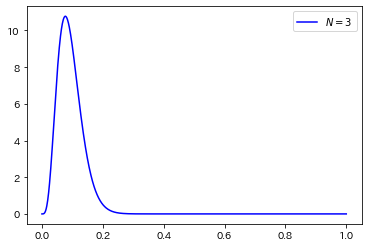

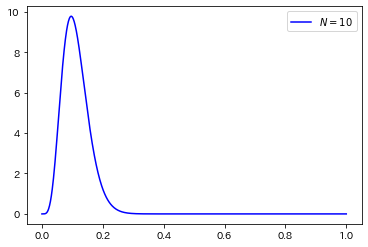

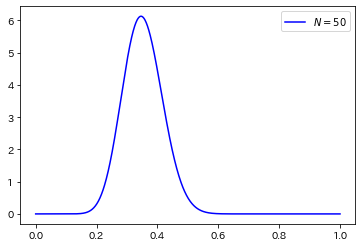

In [12]:
# 真のmu
mu_truth = 0.25

# ハイパーパラメータ
a = 3
b = 1

# データの個数
N = 50

mu = np.linspace(0, 1, 1000)
X = np.random.binomial(n=1, p=mu_truth, size=N)
draw_times = [0, 3, 10, 50]
l = ['$N=0$', '$N=3$', '$N=10$', '$N=50$']

for i in range(len(draw_times)):
    # (3.15)
    a_hat = np.sum(X[:draw_times[i]]) + a
    b_hat = N - np.sum(X[:draw_times[i]]) + b
    # (3.14)
    p_mu_X = Beta(mu, a_hat, b_hat)
    
    fig, ax = plt.subplots()
    ax.plot(mu, p_mu_X, color='b', label=l[i])
    ax.legend()

未観測の$x_*\in \{0,1\}$に対する予測分布

In [14]:
a = 1
b = 3
x_star = np.array([0, 1])
def func_3_18(x, a, b):
    return gamma(a + b) * gamma(x + a) * gamma(1 - x + b) / (gamma(a) * gamma(b) * gamma(a + b + 1))
p_x_star = [func_3_18(x, a, b) for x in x_star]

In [15]:
p_x_star

[0.75, 0.25]

In [17]:
def Bern(x, mu):
    """
    ベルヌーイ分布（定義通りです）
    x: 0 or 1
    mu: 1が出る確率
    """
    return mu ** x * (1 - mu) ** (1 - x)


In [20]:
p_x_star = Bern(np.array([0, 1]),  a / (a + b))
p_x_star

array([0.75, 0.25])

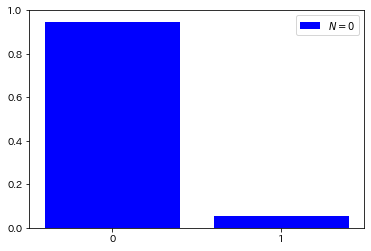

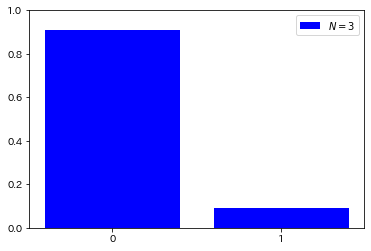

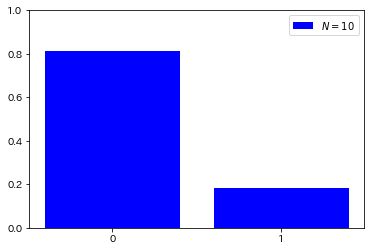

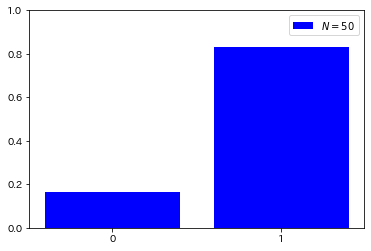

In [41]:
# 真のmu
mu_truth = 0.8

# ハイパーパラメータ
a = 3
b = 1

# データの個数
N = 50

x = np.array([0, 1])
X = np.random.binomial(n=1, p=mu_truth, size=N)
draw_times = [0, 3, 10, 50]
l = ['$N=0$', '$N=3$', '$N=10$', '$N=50$']

for i in range(len(draw_times)):
    # (3.22)
    mu = (np.sum(X[:draw_times[i]]) + a) / (N + a + b)
    p_mu_X = Bern(x, mu)
    
    fig, ax = plt.subplots()
    ax.bar(x, p_mu_X, color='b', label=l[i])
    ax.set_xticks([0, 1]) 
    ax.set_xticklabels([0, 1])
    ax.set_ylim(0, 1)
    ax.legend()


# 3.2.2 カテゴリ分布の学習と予測

In [42]:
def Cat(s, pi):
    prob = 1
    for k in range(len(pi)):
        prob *= pi[k] ** s[k]
    return prob
